In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import funciones as fs

importamos las librerias con las que trabajaremos durante este proyecto. 

procedemos a generar los df de los dos datasets correspondientes al registro de interacciones de los clientes.

In [2]:
df_pt1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [3]:
df_pt2 = pd.read_csv("df_final_web_data_pt_2.csv")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


Procedemos a unirlos para poder empezar a trabajar en la limpieza de datos. 

In [4]:
df_webdata = pd.concat([df_pt1, df_pt2], axis=0, ignore_index = True)
df_webdata

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_webdata.to_csv("webdata.csv", index=False)

UNA VEZ QUE UNIMOS LOS DOS DF PROCEDEMOS GUARDARLO EN UN ARCHIVO CSV PARA NO TENER QUE EJECUTAR EL CONCAT CADA VEZ QUE UTILICEMOS EL CODIGO.

In [6]:
df_webdata = pd.read_csv("webdata.csv")

In [7]:
fs.informe(df_webdata)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None
Descripción estadística:
          client_id
count  7.554050e+05
mean   5.013632e+06
std    2.879152e+06
min    1.690000e+02
25%    2.519882e+06
50%    5.033441e+06
75%    7.496063e+06
max    9.999875e+06
Valores nulos:
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
Tipos de datos:
client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object
Primeras 5 filas:
   client_id        

In [8]:
fs.datos(df_webdata)

datos nulos
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
datos totales
client_id       755405
visitor_id      755405
visit_id        755405
process_step    755405
date_time       755405
dtype: int64
porcentaje de nulos
client_id       0.0
visitor_id      0.0
visit_id        0.0
process_step    0.0
date_time       0.0
dtype: float64
datos duplicados
10764
True


TENIENDO EN CUENTA QUE NO HAY VALORES NULOS PROCEDEREMOS A AVANZAR EN EL ANALISIS DIVIDIENDO LA COLUMNA DATE_TIME PARA QUE LUEGO SEA MAS SENCILLO DE ANALIZAR

In [9]:
df_webdata['date_time'] = pd.to_datetime(df_webdata['date_time'])

In [10]:
df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [11]:
df_webdata.describe(include="object")

,visitor_id,visit_id,process_step
count,755405,755405,755405
unique,130236,158095,5
top,722943003_3441581446,875138661_34710212496_881092,start
freq,104,104,243945


HABIENDO HECHO EL PRIMER ANALISIS DE TODOS LOS DATOS, PROCEDEREMOS A CALCULAR LA PROPORCION DE CASOS FINALIZADOS POR LOS CLIENTES.  

In [23]:
client_total = df_webdata["client_id"].nunique()
client_total

120157

In [24]:
client_confirm = df_webdata[df_webdata["process_step"] == "confirm"]["client_id"].nunique()
client_confirm

81145

In [22]:
tasa_confirm = round(((client_confirm/client_total)*100), 2)
tasa_confirm

67.53

LA TASA DE FINALIZACIÓN ES DEL 67.53%, VEAMOSLO EN UN GRAFICO.

In [25]:
users_no_confirm = client_total - client_confirm
users_no_confirm

39012

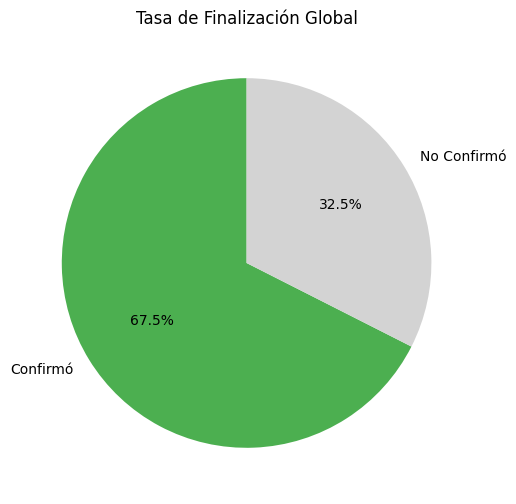

In [26]:
labels = ["Confirmó", "No Confirmó"]
sizes = [client_confirm, users_no_confirm]
colors = ["#4CAF50", "#D3D3D3"]

plt.figure(figsize=(6,6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title("Tasa de Finalización Global")
plt.show()

SEGUIMOS AVANZANDO EN EL ANALISIS, LO SIGUIENTE ES SABER CUAL FUE LA DURACIÓN PROMEDIO QUE LOS USUARIOS DEDICARON A CADA PASO.

ORDENAMOS EL DF POR CLIENT_ID Y DATE_TIME PARA AVANZAR EN LOS ANALISIS.

In [16]:
df_webdata = df_webdata.sort_values(by=['client_id', 'date_time'])
df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09


PROCEDEMOS CREAR UNA COLUMNA "NEXT_TIME" LA CUAL TENDRA EL SIGUIENTE "DATE_TIME" QUE LE CORRESPONDA.

In [17]:
df_webdata["next_time"] = (df_webdata.groupby("client_id")["date_time"].shift(-1))
df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaT


CREAMOS OTRA COLUMNA PARA SACAR LA DIFERENCIA ENTRE "DATE_TIME" Y "NEXT_TIME"  

In [18]:
df_webdata["duracion"] = (df_webdata["next_time"] - df_webdata["date_time"])
df_webdata["duracion"] = (df_webdata["duracion"]).dt.total_seconds()

df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time,duracion
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaT,NaN


UNA VEZ QUE GENERAMOS LA COLUMNA DE DURACION, ELIMINAREMOS AQUELLOS NULOS PARA PODER TENER EL PROMEDIO DE DURACION DE LOS USUARIOS. 

In [19]:
df_webdata = df_webdata.dropna(subset=["duracion"])

In [20]:
media_duracion = ((df_webdata.groupby("process_step")["duracion"].mean()) / 60) #LO DIVIDIMOS POR 60 PARA TENERLO EN MINUTOS Y QUE SEAN NUMEROS MAS LEGIBLES.
media_duracion = media_duracion.reset_index()
media_duracion

,process_step,duracion
0,confirm,4333.915056
1,start,1377.811341
2,step_1,560.998020
3,step_2,314.427717
4,step_3,541.665057


VAMOS A GRAFICARLO PARA TENER UNA VISUALIZACIÓN DE LO ANALIZADO

C:\Users\eliom\AppData\Local\Temp\ipykernel_19460\4036990804.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_duracion, x="process_step", y="duracion", palette="Set2")


Text(0.5, 1.0, 'Duración promedio por paso')

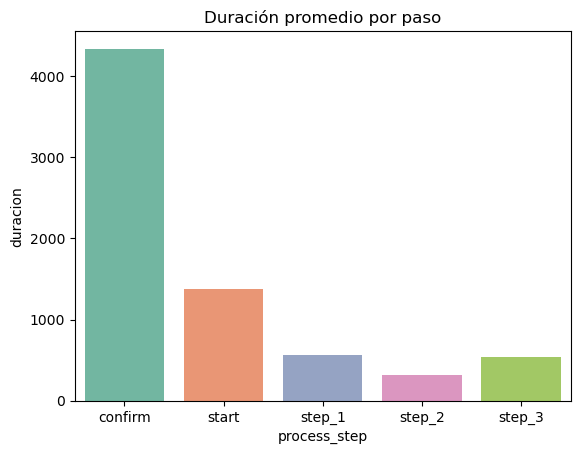

In [21]:
sns.barplot(data=media_duracion, x="process_step", y="duracion", palette="Set2")
plt.title("Duración promedio por paso")

VAMOS AHORA A ANALIZARA LA TASA DE RETROCESO DE LOS CLIENTES DURANTE EL USO DEL NUEVO DISEÑO. PRIMERO CREAREMOS UNA NUEVA COLUMNA ASIGNANDOLE UN VALOR A CADA PASO. 

In [22]:
pasos_orden = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}

df_webdata["step_number"] = df_webdata["process_step"].map(pasos_orden)
df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time,duracion,step_number
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0,0
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0,1
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0,2
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0,3
628456,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55,2017-06-01 07:42:43,948.0,0


AL IGUAL QUE PARA CALCULAR EL TIEMPO, CREAREMOS UNA COLUMNA PARA TENER EL SIGUIENTE PASO

In [23]:
df_webdata["paso_sig"] = (df_webdata.groupby("client_id")["step_number"].shift(-1))
df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time,duracion,step_number,paso_sig
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0,0,1.0
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0,1,2.0
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0,2,3.0
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0,3,NaN
628456,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55,2017-06-01 07:42:43,948.0,0,NaN


CON ESTA NUEVA COLUMNA PODEMOS VERIFICAR SI EL USUARIO HA VUELTO HACIA ATRAS EN ALGUN PASO O NO, PARA LUEGO CALCULAR LA TASA DE ERROR. 

In [24]:
df_webdata["check_error"] = (df_webdata["paso_sig"] < df_webdata["step_number"])
df_webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time,duracion,step_number,paso_sig,check_error
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0,0,1.0,False
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0,1,2.0,False
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0,2,3.0,False
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0,3,NaN,False
628456,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55,2017-06-01 07:42:43,948.0,0,NaN,False


In [25]:
media_error_avg = round((df_webdata["check_error"].mean() * 100),2)
print(media_error_avg)
media_error_count = df_webdata["check_error"].value_counts()
print(media_error_count)

10.22
check_error
False    570294
True      64954
Name: count, dtype: int64


LA TASA DE ERROR ES DEL 10,22%. VAMOS A GRAFICARLO PARA TENER UNA VISUALIZACIÓN. 

In [26]:
error_step = (df_webdata.groupby("process_step")["check_error"].sum().reset_index())
error_step

,process_step,check_error
0,confirm,3074
1,start,0
2,step_1,24382
3,step_2,17924
4,step_3,19574


Text(0.5, 1.0, 'Cantidad de errores por paso')

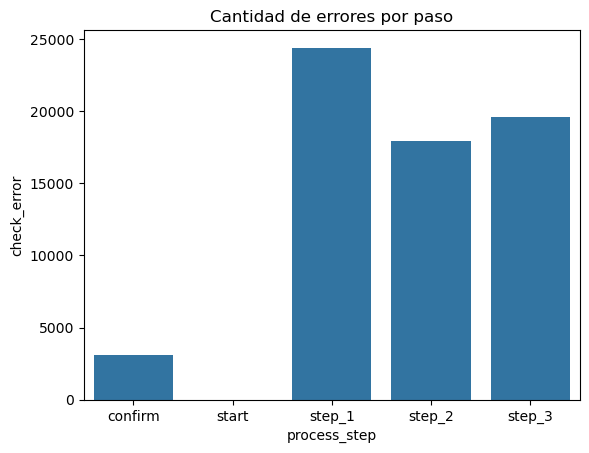

In [27]:
sns.barplot(data=error_step, x="process_step", y="check_error")
plt.title("Cantidad de errores por paso")

In [28]:
df_webdata['client_id'].nunique()

113146

In [29]:
df_webdata.to_csv("finalweb.csv", index=False)